<a href="https://colab.research.google.com/github/BhaskarBiswas/Python-Codes/blob/master/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


Getting files from local system

In [2]:
from google.colab import files
import io

In [3]:
uploaded = files.upload()

Saving comp_classification_train.csv to comp_classification_train.csv


In [4]:
train_file = pd.read_csv(io.BytesIO(uploaded["comp_classification_train.csv"]))

In [5]:
uploaded = files.upload()

Saving comp_classification_test.csv to comp_classification_test.csv


In [6]:
test_file = pd.read_csv(io.BytesIO(uploaded['comp_classification_test.csv']))

In [ ]:
train_file.head()



,index,tcin,comp_title,image_url,brand,tgt_item_type,department_name,division_name
0,0,11341285,Oprah's Book Club: Night (Hardcover),NaN,Macmillan,Books,BOOKS/MAGAZINES,ENTERTAINMENT
1,4,11825477,"Who Was Martin Luther King, Jr.?",NaN,Readerlink,Books,BOOKS/MAGAZINES,ENTERTAINMENT
2,5,11944343,ONLINE ONLY TIME'S MAKIN CHANGES:,NaN,NaN,music,TCOM MUSIC 1,ENTERTAINMENT
3,6,12615521,Bausch & Lomb Biotrue for Soft Contact Lenses ...,https://i5.walmartimages.com/asr/c35eee8a-f7bc...,Biotrue,Contact Lens Solution,OTC-PERSONAL CARE,OTC
4,7,12834908,Burt's Bees Peach and Willow Bark Exfoliating ...,https://i5.walmartimages.com/asr/af8e1166-bad5...,Burt's Bees,Facial Cleansers,SKIN/BATH/FRAGRANCES,BEAUTY


In [ ]:
test_file.head()

,index,tcin,comp_title,image_url,brand,tgt_item_type,department_name,division_name
0,57247,51022003,3D PUZZLE 3D CRYSTAL PUZZLE,https://i5.walmartimages.com/asr/4218ec5e-047b...,Bepuzzled,3D Puzzles,GAMES/DIECAST/ACTION FIGURES,TOYS
1,163415,51022024,3D PUZZLE 3D CRYSTAL PUZZLE,NaN,Bepuzzled,3D Puzzles,GAMES/DIECAST/ACTION FIGURES,TOYS
2,148979,80432024,DELUXE 3D CRYSTAL PU,NaN,Bepuzzled,3D Puzzles,GAMES/DIECAST/ACTION FIGURES,TOYS
3,83203,81306355,OWL WHITE,https://i5.walmartimages.com/asr/655b23e3-c3bd...,University Games,3D Puzzles,GAMES/DIECAST/ACTION FIGURES,TOYS
4,42853,80432027,ONLINE: PUZZLE DELUXE 3D CRYSTAL,https://i5.walmartimages.com/asr/0c9212c7-4b32...,Bepuzzled,3D Puzzles,GAMES/DIECAST/ACTION FIGURES,TOYS


In [7]:
train_na_removed = train_file.dropna() 
test_na_removed = test_file.dropna() 

In [ ]:
!pip install spellchecker

     |████████████████████████████████| 3.9MB 12.0MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-cp36-none-any.whl size=3966516 sha256=a6d46236094998392c13d99d107aa00579cc690782ce126b5699641252ca9e27
  Stored in directory: /root/.cache/pip/wheels/a2/e6/ad/28ab959cba7100f5c562a3d1711cd34b630734d241c4e1bd40
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-cp36-none-any.whl size=7114 sha256=91ab1916fcda57aa46c29a2c3ab60f6235eb8d729c972fe708cfd5a4a298cc9d
  Stored in directory: /root/.cache/pip/wheels/58/e0/c1/e3fed0e9fd1a3708bc91870fb0ba30ef88527540006763674b
  Created wheel for soundex: filename=soundex-1.1.3-cp36-none-any.whl size=8862 sha256=c0071f787deea401f3679b78547dce18172968608b3ca364a31089dcbb70707e
  Stored in directory: /root/.cache/pip/wheels/b5/bb/e6/9a4b6be56c40aa707509bddaf6d414187461ded9db7a25a41a
  Created wheel for silpa-common: filename=silpa_common-0.3-cp36-none-any.whl size=8453 sha256=a756cdf4ef6012e9198e52e804e789354dd7fd80bc81ecdc6

In [8]:
def text_clean(input_file):
  # 1: Convert in Lower Case
  input_file=input_file.lower()
  #print(input_file)

  # 2: Removal of HTML Tags using BeautifulSoup get_text() feature
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(input_file, "lxml")
  input_file = soup.get_text().replace("\t", " ").replace("\r", " ").replace("\n", " ")
  #print(input_file)

  # 3: Removal of URLs
  import re
  def remove_url(text):
      url_remove = re.compile(r'https?://\S+|http?://\S+|www\.\S+')
      return url_remove.sub(r'', text)

  input_file = remove_url(input_file)
  #print(input_file)

  # 4: Remove number
  import re
  input_file=re.sub('\d','',input_file)
  #print(input_file)

  # 5: Replace punctuations with a white space
  import string
  #print(string.punctuation) #   !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
  input_file=re.sub('[%s]' % re.escape(string.punctuation), ' ', input_file)
  #print(input_file)

  # 6: Replace emoticons and emojis with a white space
  def remove_emojis(data):
      emoj = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002500-\U00002BEF"  # chinese char
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642" 
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                        "]+", re.UNICODE)
      return re.sub(emoj, '', data)

  input_file = remove_emojis(input_file)
  #print(input_file)
  '''
  # 7: Spelling check
  from spellchecker import SpellChecker
  change_dict = {}
  spell = SpellChecker()
  def correct_spellings(text):
      corrected_text = []
      misspelled_words = spell.unknown(text.split())
      for word in text.split():
          if word in misspelled_words:
              corrected_text.append(spell.correction(word))
              change_dict[word] = spell.correction(word)
          else:
              corrected_text.append(word)
      return " ".join(corrected_text)
   
  input_file = correct_spellings(input_file)
  #print(input_file)
  #print(change_dict)
  '''
  return input_file

In [9]:
train_na_removed['comp_title_cleaned'] = train_na_removed['comp_title'].map(lambda a: text_clean(a))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
test_na_removed['comp_title_cleaned'] = test_na_removed['comp_title'].map(lambda a: text_clean(a))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
train_df_selcol = train_na_removed[['comp_title_cleaned', 'division_name']]
test_df_selcol = test_na_removed[['comp_title_cleaned', 'division_name']]

In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from tqdm import tqdm_notebook
np.random.seed(500)
import warnings
from sklearn.utils.testing import ignore_warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range=(1,3))
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC, SVC, NuSVC
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

['BABY', 'BAKERY', 'BEAUTY', 'BEVERAGES', 'CAFE', 'DAIRY/FROZEN', 'DECORATIVE HOME', 'DELI', 'DOMESTICS', 'DRY GROCERY', 'ENTERTAINMENT', 'FRESH MEAT', 'HOME ELECTRONICS', 'HSHLD/PAPR', 'INT/HOS/SLEEP', 'JEWELRY/ACCESS', 'KIDS APPAREL', 'KITCHEN', 'MENS', 'MOBILE/SERVICES', 'NIT APPAREL', 'OTC', 'PETS', 'PROCESSED/FROZEN MEAT', 'PRODUCE/FLORAL', 'SEASNL/OUTDR LIVING', 'SHOES', 'SNACKS/CANDY', 'SPECIAL PROJECT', 'SPORTING GOODS', 'STATIONERY', 'STORAGE/UTILITY', 'TOYS']


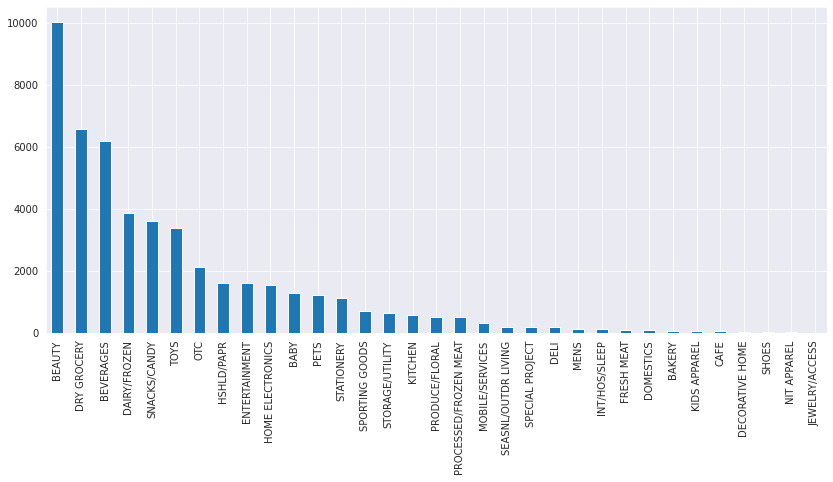

In [14]:
labels = list(train_df_selcol.division_name.unique())
labels.sort()
print(labels)
plt.figure(figsize=(14,6))
train_df_selcol.division_name.value_counts().plot(kind='bar')
plt.show()

In [15]:
def preprocessing(col,h_pct=1,l_pct=1):
    '''
    Cleans the text in the input column
    Parameters
    ----------
    col : pandas.core.series.Series
        The column which needs to be processed
    h_pct : float (default = 1)
        The percentage of high frequency words to remove from the corpus
    l_pct : float (default = 1)
        The percentage of low frequency words to remove from the corpus
    
    Returns
    -------
    cleaned text series
    '''
    #Lower case
    lower = col.apply(str.lower)
    
    #Removing HTML tags
    rem_html = lower.apply(lambda x: x.replace('#39;', "'").replace('amp;', '&')
                             .replace('#146;', "'").replace('nbsp;', ' ').replace('#36;', '$')
                             .replace('\\n', "\n").replace('quot;', "'").replace('<br />', " ")
                             .replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.')
                             .replace(' @-@ ','-').replace('\\', ' \\ ').replace('&lt;','<')
                             .replace('&gt;', '>'))
    
    #Stemming
    from nltk.stem import SnowballStemmer
    stem = SnowballStemmer('english')
    stemmed = rem_html.apply(lambda x: ' '.join(stem.stem(word) for word in str(x).split()))
    
    #removing punctuation
    import re
    rem_punc = stemmed.apply(lambda x: re.sub(r'[^\w\s]',' ',x))
    
    #removing stopwords and extra spaces
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    rem_stopwords = rem_punc.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    
    #removing numbers
    rem_num = rem_stopwords.apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))
    
    #remove words having length=1
    rem_lngth1 = rem_num.apply(lambda x: re.sub(r'[^\w\s]',' ',x))
    
    if h_pct != 0:
        #removing the top $h_pct of the most frequent words 
        high_freq = pd.Series(' '.join(rem_lngth1).split()).value_counts()[:int(pd.Series(' '.join(rem_lngth1).split()).count()*h_pct/100)]
        rem_high = rem_lngth1.apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))
    else:
        rem_high = rem_lngth1
    
    if l_pct != 0:
        #removing the top $l_pct of the least frequent words
        low_freq = pd.Series(' '.join(rem_high).split()).value_counts()[:-int(pd.Series(' '.join(rem_high).split()).count()*l_pct/100):-1]
        rem_low = rem_high.apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))
    else:
        rem_low = rem_high
    
    return rem_low

In [38]:
%matplotlib inline
def prep_fit_pred(df_train, df_test, h_pct, l_pct, model, y_var_column, x_var_column, verbose=False):
    '''
    Takes the dataframe, and returns asset tag predictions for the stories
    Parameters
    ----------
    df_train : pandas.core.frame.DataFrame
        Train dataset
    df_train : pandas.core.frame.DataFrame
        Test dataset
    h_pct : float
        The percentage of high frequency words to remove from the corpus
    l_pct : float
        The percentage of low frequency words to remove from the corpus
    model : the model which will be used for predictions
    verbose : boolean (default: False)
        Verbosity of the output. True = all outputs, False = no outputs
    y_var_column : string
        Name of the y column
    x_var_column : string
        Name of the x column
            
    Returns
    -------
    preds : pandas.core.series.Series
        Column with the predicted asset class
    acc : float
        Accuracy of the predictions on the test set
    model : the trained model
    '''
    
    df_train['concat_processed'] = preprocessing(df_train[x_var_column],h_pct,l_pct)
    df_test['concat_processed'] = preprocessing(df_test[x_var_column],h_pct,l_pct)
    
    if verbose:
        print('Number of words in corpus before processing: {}'
              .format(df_train[x_var_column].apply(lambda x: len(x.split(' '))).sum()))
        print('Number of words in corpus after processing: {} ({}%)'
              .format(df_train['concat_processed'].apply(lambda x: len(x.split(' '))).sum()
                     , round(df_train['concat_processed'].apply(lambda x: len(x.split(' '))).sum()*100\
                             /df_train[x_var_column].apply(lambda x: len(x.split(' '))).sum())))
 

    X_train = df_train['concat_processed']
    y_train = df_train[y_var_column]

    X_test = df_test['concat_processed']
    y_test = df_test[y_var_column]
    
    bow_xtrain = bow.fit_transform(X_train)
    bow_xtest = bow.transform(X_test)
    model.fit(bow_xtrain,y_train)
    preds = model.predict(bow_xtest)
    acc = accuracy_score(y_test,preds)*100

    print('Accuracy: {0:.2f}%'.format(acc))
    print('Model: '.format(model))
    '''
    if verbose:
        plt.figure(figsize=(14,14))
        sns.heatmap(confusion_matrix(y_test,preds),cbar=False,annot=True,square=True,xticklabels=labels,yticklabels=labels,fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.yticks(rotation=0)
        plt.show()
        print(classification_report(y_test,preds))
        print('Accuracy: {0:.2f}%'.format(acc))
    '''
    return preds, acc, model

In [39]:
preds_abc, acc_abc, abc = prep_fit_pred(train_df_selcol, test_df_selcol, 0, 1, LinearSVC(), 'division_name', 'comp_title_cleaned', verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Number of words in corpus before processing: 548353
Number of words in corpus after processing: 369367 (67%)
Accuracy: 93.44%
Model: 


In [41]:
preds_abc, acc_abc, abc = prep_fit_pred(train_df_selcol, test_df_selcol, 0, 1, SVC(), 'division_name', 'comp_title_cleaned', verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Number of words in corpus before processing: 548353
Number of words in corpus after processing: 369367 (67%)


KeyboardInterrupt: ignored

In [ ]:
preds_abc, acc_abc, abc = prep_fit_pred(train_df_selcol, test_df_selcol, 0, 1, NuSVC(), 'division_name', 'comp_title_cleaned', verbose=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
preds_abc, acc_abc, abc = prep_fit_pred(train_df_selcol, test_df_selcol, 0, 1, RandomForestClassifier(), 'division_name', 'comp_title_cleaned', verbose=True)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
preds_abc, acc_abc, abc = prep_fit_pred(train_df_selcol, test_df_selcol, 0, 1, GradientBoostingClassifier(), 'division_name', 'comp_title_cleaned', verbose=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>